<a href="https://colab.research.google.com/github/Maspie/Roadmap/blob/main/bias_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import important libraries

In [1]:
pip install fairlearn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference

In [3]:
# Load dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None)

# Define column names
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]
df.columns = columns

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Trim spaces and lowercase values for object columns
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip().str.lower()

df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["race"] = df["race"].map({"white": 1, "black": 2, "asian-pac-islander": 3, "amer-indian-eskimo": 4, "other": 5})
df["income"] = df["income"].map({"<=50k": 0, ">50k": 1})

# Drop irrelevant columns
df = df.drop(["fnlwgt", "education", "native-country"], axis=1)

# Check if the dataset is correct
print(df["sex"].value_counts())
print(df["income"].value_counts())
print(df.groupby("sex")["income"].mean())

sex
1    21790
0    10771
Name: count, dtype: int64
income
0    24720
1     7841
Name: count, dtype: int64
sex
0    0.109461
1    0.305737
Name: income, dtype: float64


In [6]:
# Fairness Calculation (using Gender)
bias_column = "sex"   # Using gender as the sensitive feature
target_column = "income"

dem_parity = demographic_parity_difference(y_true=df[target_column], y_pred=df[target_column], sensitive_features=df[bias_column])
eq_odds = equalized_odds_difference(y_true=df[target_column], y_pred=df[target_column], sensitive_features=df[bias_column])

# Print Fairness Results
print(f"\n📊 Fairness Analysis for {bias_column}:")
print(f"👉 Demographic Parity Difference: {dem_parity:.4f}")
print(f"👉 Equalized Odds Difference: {eq_odds:.4f}")

if abs(dem_parity) > 0.1 or abs(eq_odds) > 0.1:
    print("\n⚠️ Bias Detected!")
else:
    print("\n✅ No significant bias detected.")


📊 Fairness Analysis for sex:
👉 Demographic Parity Difference: 0.1963
👉 Equalized Odds Difference: 0.0000

⚠️ Bias Detected!


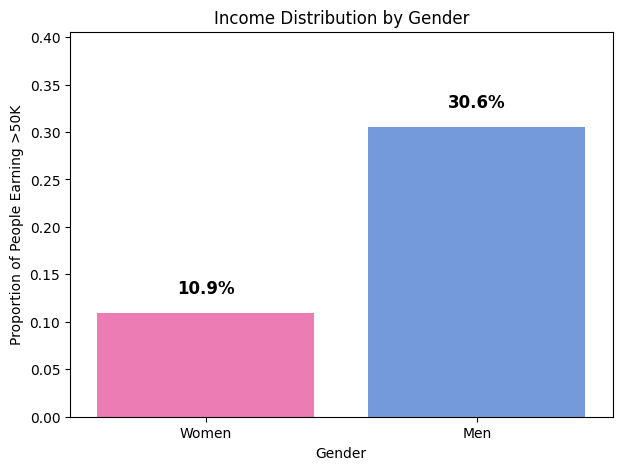

In [7]:
# Gender Bias Visualization
gender_labels = {1: "Men", 0: "Women"}
gender_bias = df.groupby("sex")["income"].mean()

plt.figure(figsize=(7, 5))
# Prepare x-axis labels based on the gender_bias index
x_labels = [gender_labels[key] for key in gender_bias.index]

# Create the bar plot with hue assigned as the same as x
ax = sns.barplot(x=x_labels,
                 y=gender_bias,
                 hue=x_labels,               # Assign x values to hue
                 palette=["#FF69B4", "#6495ED"],
                 dodge=False)

# Remove the legend since it's redundant
if ax.get_legend():
    ax.legend_.remove()

# Add percentage labels above each bar
for i, v in enumerate(gender_bias):
    ax.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.ylabel("Proportion of People Earning >50K")
plt.xlabel("Gender")
plt.title("Income Distribution by Gender")
plt.ylim(0, max(gender_bias) + 0.1)
plt.show()


In [10]:
bias_column_1 = "race"
target_column_1 = "income"

dem_parity_1 = demographic_parity_difference(y_true= df[target_column_1], y_pred= df[target_column_1], sensitive_features= df[bias_column_1])
eq_odds_1 = equalized_odds_difference(y_true= df[target_column_1], y_pred= df[target_column_1], sensitive_features= df[bias_column_1])

# Print Fairness Results
print(f"\n📊 Fairness Analysis for {bias_column_1}:")
print(f"👉 Demographic Parity Difference: {dem_parity_1:.4f}")
print(f"👉 Equalized Odds Difference: {eq_odds_1:.4f}")

if abs(dem_parity_1) > 0.1 or abs(eq_odds_1) > 0.1:
    print("\n⚠️ Bias Detected!")
else:
    print("\n✅ No significant bias detected.")


📊 Fairness Analysis for race:
👉 Demographic Parity Difference: 0.1734
👉 Equalized Odds Difference: 0.0000

⚠️ Bias Detected!


<ipython-input-15-2317dd7b2550>:10: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=x_labels_1,


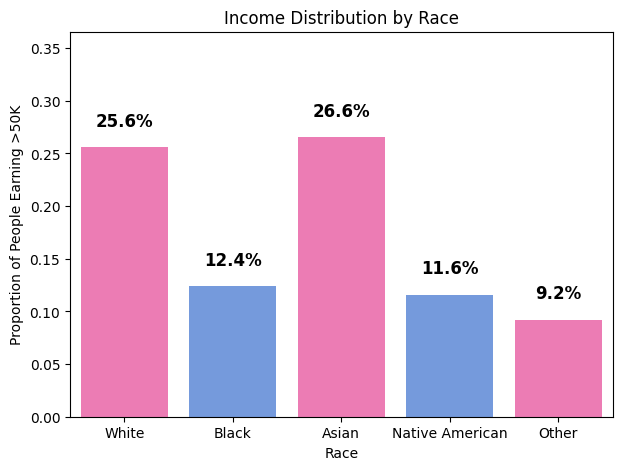

In [15]:
# Race Bias Visualization
race_labels = {1: "White", 2: "Black", 3: "Asian", 4: "Native American", 5: "Other"}
race_bias = df.groupby("race")["income"].mean()

plt.figure(figsize=(7, 5))
# Prepare x-axis labels based on the race_bias index
x_labels_1 = [race_labels[key] for key in race_bias.index]

# Create the bar plot with hue assigned as the same as x
ax = sns.barplot(x=x_labels_1,
                 y=race_bias,
                 hue=x_labels_1,               # Assign x values to hue
                 palette=["#FF69B4", "#6495ED"],
                 dodge=False)

# Remove the legend since it's redundant
if ax.get_legend():
    ax.legend_.remove()

# Add percentage labels above each bar
for i, v in enumerate(race_bias):
    ax.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.ylabel("Proportion of People Earning >50K")
plt.xlabel("Race")
plt.title("Income Distribution by Race")
plt.ylim(0, max(race_bias) + 0.1)
plt.show()


In [13]:
print(race_bias.index)

Index([1, 2, 3, 4, 5], dtype='int64', name='race')
